In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

# Lokasi file
file_path = "data/obesity.csv"
# Memuat dataset
df = pd.read_csv(file_path)

print("--- 1. Import & Load Dataset ---")
print("\n5 Baris Pertama Dataset:")
df.head()

--- 1. Import & Load Dataset ---

5 Baris Pertama Dataset:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [27]:
print("\nInformasi Dataset (Tipe Data dan Non-Null Counts):")
df.info()


Informasi Dataset (Tipe Data dan Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-nu

In [28]:
# Cek bentuk dataset
print("\nBentuk Dataset (Baris, Kolom):", df.shape)

# Cek deskripsi statistik
print("\nDeskripsi Statistik (Semua Fitur):")
df.describe(include='all')


Bentuk Dataset (Baris, Kolom): (2111, 17)

Deskripsi Statistik (Semua Fitur):


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [29]:
print("\nJumlah Missing Values:")
df.isnull().sum()


Jumlah Missing Values:


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [30]:
# Cek duplikasi data
duplicates = df.duplicated().sum()
print(f"\nJumlah Duplikasi Data: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplikasi telah dihapus.")
    print("Bentuk Dataset Setelah Duplikasi Dihapus:", df.shape)


Jumlah Duplikasi Data: 24
Duplikasi telah dihapus.
Bentuk Dataset Setelah Duplikasi Dihapus: (2087, 17)


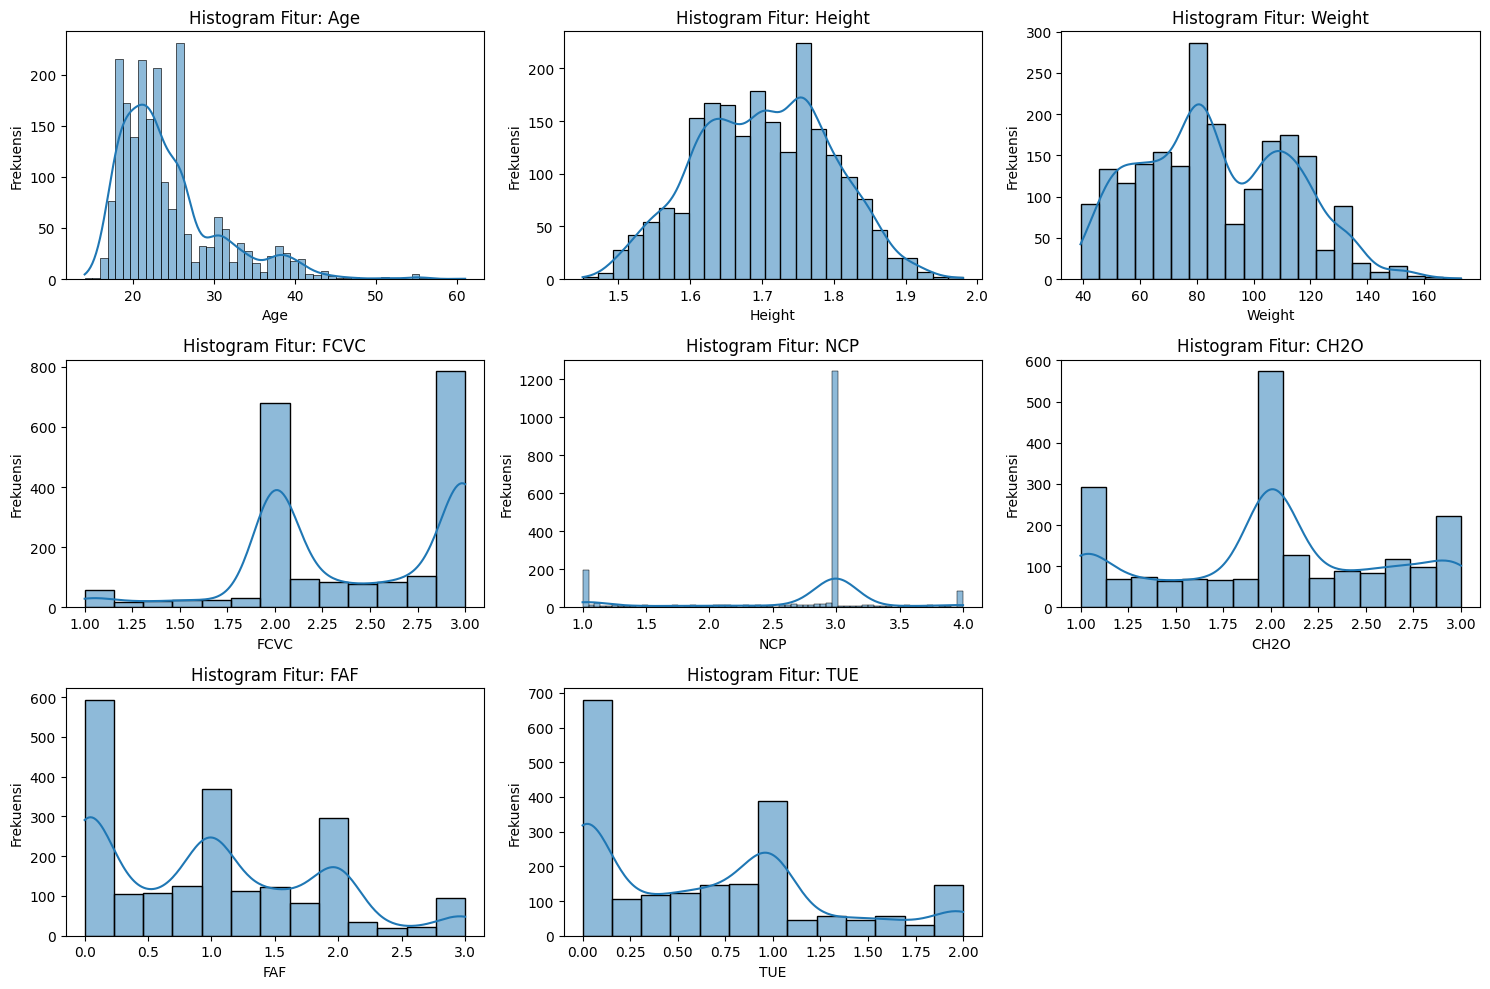

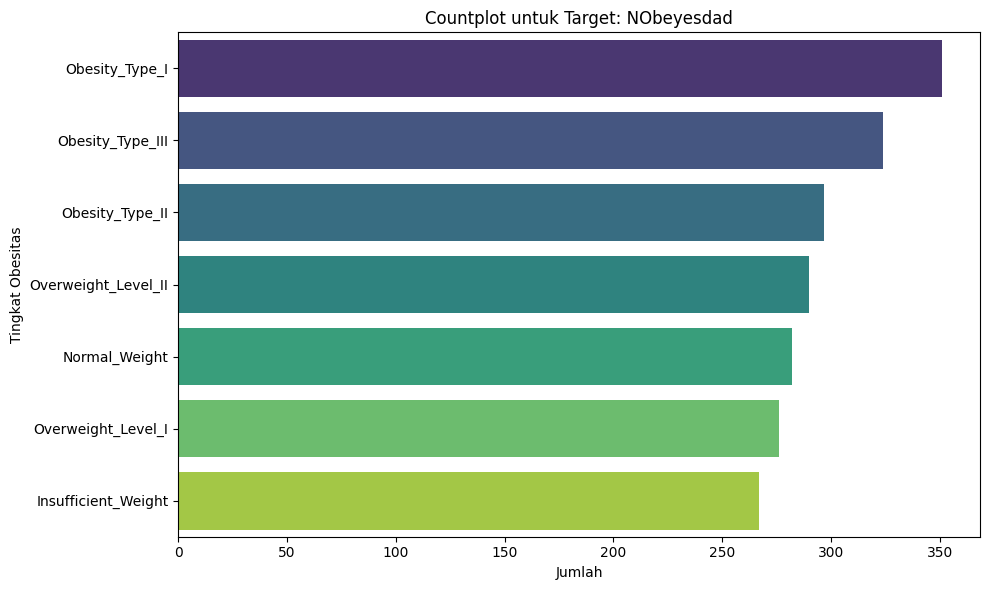

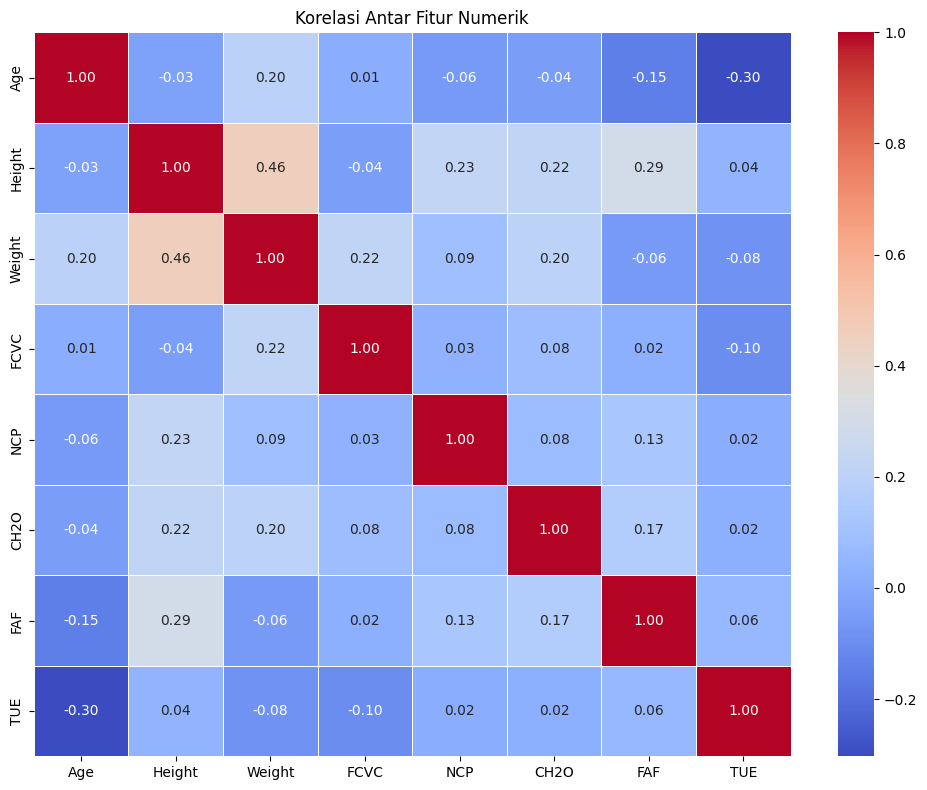

In [31]:
# Identifikasi fitur numerik dan kategorikal
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'NObeyesdad'

# Visualisasi 1: Histogram untuk semua fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram Fitur: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()  

# Visualisasi 2: Countplot untuk target
plt.figure(figsize=(10, 6))
sns.countplot(y=df[target_column], order=df[target_column].value_counts().index, palette='viridis')
plt.title(f'Countplot untuk Target: {target_column}')
plt.xlabel('Jumlah')
plt.ylabel('Tingkat Obesitas')
plt.tight_layout()
plt.show()  

# Cek korelasi antar fitur numerik (heatmap)
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show() 

In [32]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Split dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Preprocessor untuk fitur numerik: Normalisasi (StandardScaler)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessor untuk fitur kategorikal: Encoding (OneHotEncoder)
categorical_transformer = Pipeline(steps=[
  
  
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gabungkan preprocessors menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False # Untuk output nama kolom yang lebih bersih
)
preprocessor.set_output(transform="pandas")

X_train shape: (1669, 16), y_train shape: (1669,)
X_test shape: (418, 16), y_test shape: (418,)


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [33]:
print("--- Analisis Hyperparameter Tuning: n_estimators ---")

# Tentukan range nilai n_estimators yang akan diuji
n_estimators_values = [10, 25, 50, 75, 100, 150, 200, 250, 300]

# Dictionary untuk menyimpan hasil
results = {
    'n_estimators': [],
    'train_accuracy': [],
    'test_accuracy': [],
    'train_time': [],
    'predict_time': [],
    'cv_mean_score': [],
    'cv_std_score': [],
    'f1_weighted': [],
    'precision_weighted': [],
    'recall_weighted': []
}

print("\nMenjalankan eksperimen dengan berbagai nilai n_estimators...")

for n_est in n_estimators_values:
    print(f"\nMenganalisis n_estimators = {n_est}...")
    
    # Buat model dengan n_estimators tertentu
    model = RandomForestClassifier(n_estimators=n_est, random_state=42, n_jobs=-1)
    
    # Buat pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training dengan pengukuran waktu
    start_train = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    # Prediksi dengan pengukuran waktu
    start_predict = time.time()
    y_pred = pipeline.predict(X_test)
    predict_time = time.time() - start_predict
    
    # Hitung metrik
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Simpan hasil
    results['n_estimators'].append(n_est)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_time'].append(train_time)
    results['predict_time'].append(predict_time)
    results['cv_mean_score'].append(cv_scores.mean())
    results['cv_std_score'].append(cv_scores.std())
    results['f1_weighted'].append(f1_weighted)
    results['precision_weighted'].append(precision_weighted)
    results['recall_weighted'].append(recall_weighted)
    
    print(f"  ✓ Train Accuracy: {train_accuracy:.4f}")
    print(f"  ✓ Test Accuracy:  {test_accuracy:.4f}")
    print(f"  ✓ CV Mean Score:  {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print(f"  ✓ Training Time:  {train_time:.4f} detik")
    print(f"  ✓ Prediction Time: {predict_time:.4f} detik")

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results)

print("Ringkasan Hasil Analisis n_estimators")
print(results_df.to_string(index=False))


--- Analisis Hyperparameter Tuning: n_estimators ---

Menjalankan eksperimen dengan berbagai nilai n_estimators...

Menganalisis n_estimators = 10...
  ✓ Train Accuracy: 0.9964
  ✓ Test Accuracy:  0.9115
  ✓ CV Mean Score:  0.9005 (+/- 0.0176)
  ✓ Training Time:  0.0501 detik
  ✓ Prediction Time: 0.0471 detik

Menganalisis n_estimators = 25...
  ✓ Train Accuracy: 1.0000
  ✓ Test Accuracy:  0.9258
  ✓ CV Mean Score:  0.9215 (+/- 0.0168)
  ✓ Training Time:  0.0752 detik
  ✓ Prediction Time: 0.0254 detik

Menganalisis n_estimators = 50...
  ✓ Train Accuracy: 1.0000
  ✓ Test Accuracy:  0.9234
  ✓ CV Mean Score:  0.9329 (+/- 0.0197)
  ✓ Training Time:  0.1150 detik
  ✓ Prediction Time: 0.0392 detik

Menganalisis n_estimators = 75...
  ✓ Train Accuracy: 1.0000
  ✓ Test Accuracy:  0.9330
  ✓ CV Mean Score:  0.9305 (+/- 0.0228)
  ✓ Training Time:  0.2544 detik
  ✓ Prediction Time: 0.0339 detik

Menganalisis n_estimators = 100...
  ✓ Train Accuracy: 1.0000
  ✓ Test Accuracy:  0.9378
  ✓ CV Mean


✓ Visualisasi disimpan ke: hyperparameter_tuning_analysis.png


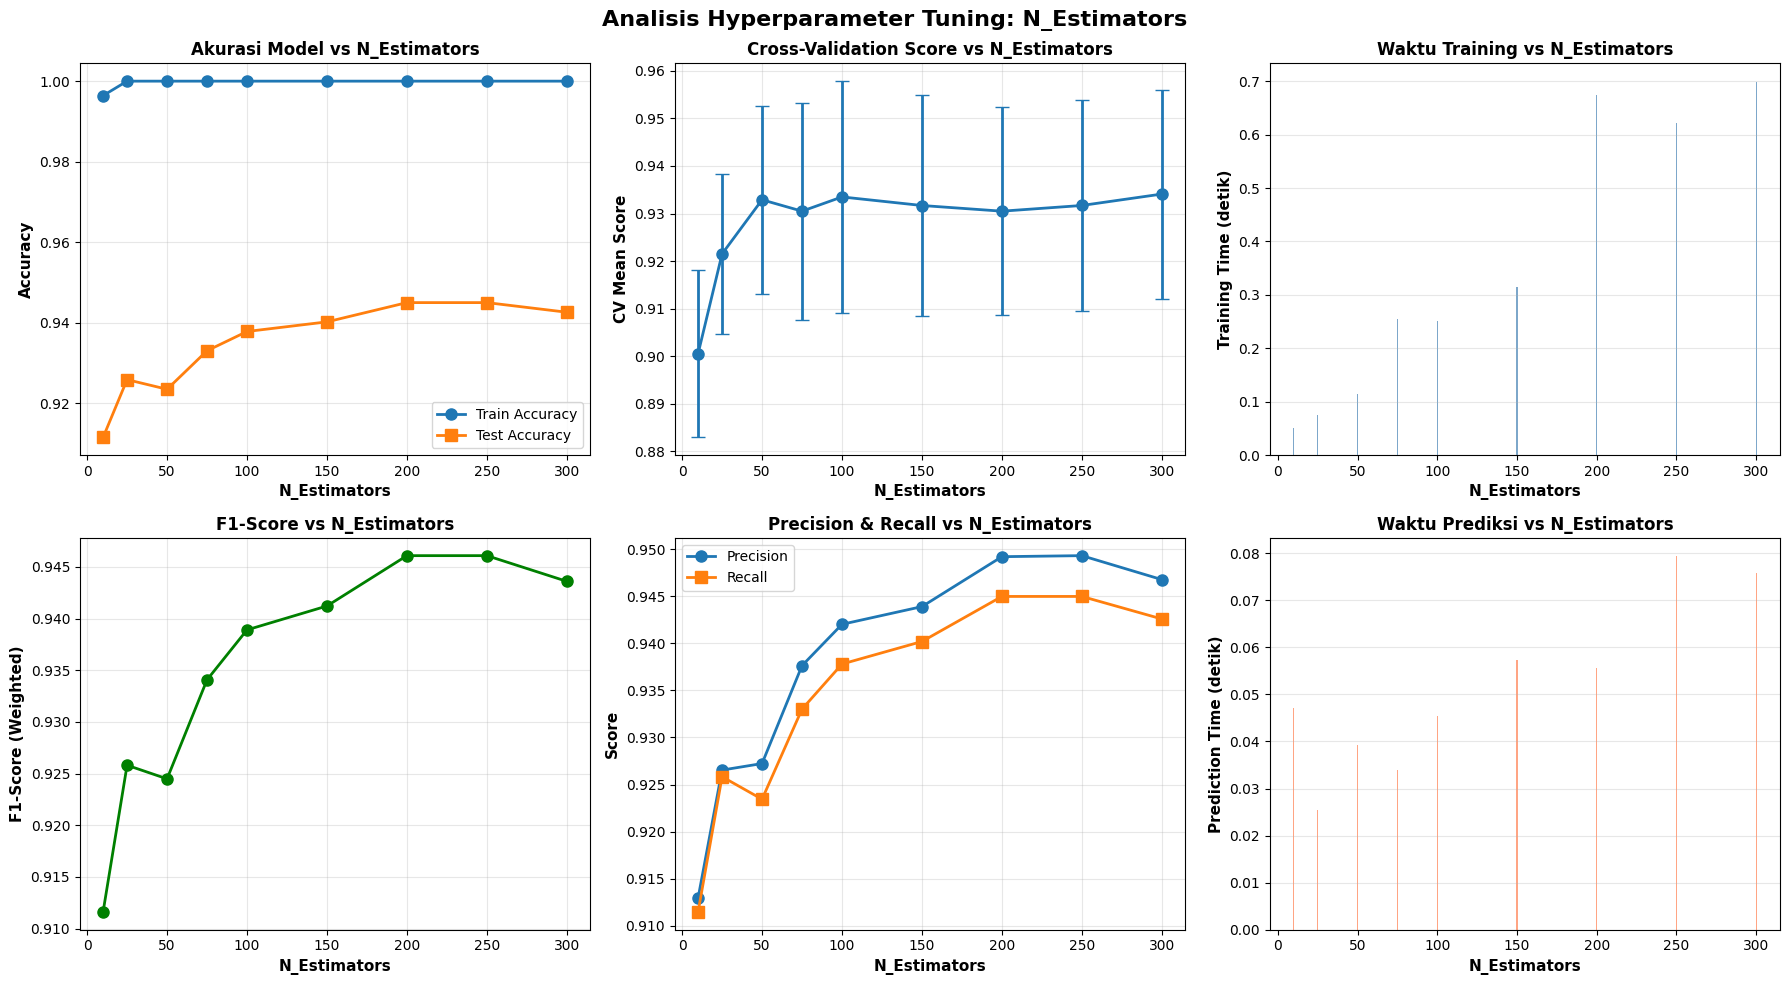

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Analisis Hyperparameter Tuning: N_Estimators', fontsize=16, fontweight='bold')

# Plot 1: Accuracy vs N_Estimators
ax1 = axes[0, 0]
ax1.plot(results_df['n_estimators'], results_df['train_accuracy'], 'o-', label='Train Accuracy', linewidth=2, markersize=8)
ax1.plot(results_df['n_estimators'], results_df['test_accuracy'], 's-', label='Test Accuracy', linewidth=2, markersize=8)
ax1.set_xlabel('N_Estimators', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Akurasi Model vs N_Estimators', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Cross-Validation Score
ax2 = axes[0, 1]
ax2.errorbar(results_df['n_estimators'], results_df['cv_mean_score'], 
             yerr=results_df['cv_std_score'], fmt='o-', capsize=5, linewidth=2, markersize=8)
ax2.set_xlabel('N_Estimators', fontsize=11, fontweight='bold')
ax2.set_ylabel('CV Mean Score', fontsize=11, fontweight='bold')
ax2.set_title('Cross-Validation Score vs N_Estimators', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Plot 3: Training Time
ax3 = axes[0, 2]
ax3.bar(results_df['n_estimators'], results_df['train_time'], color='steelblue', alpha=0.7)
ax3.set_xlabel('N_Estimators', fontsize=11, fontweight='bold')
ax3.set_ylabel('Training Time (detik)', fontsize=11, fontweight='bold')
ax3.set_title('Waktu Training vs N_Estimators', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Weighted F1-Score
ax4 = axes[1, 0]
ax4.plot(results_df['n_estimators'], results_df['f1_weighted'], 'o-', color='green', linewidth=2, markersize=8)
ax4.set_xlabel('N_Estimators', fontsize=11, fontweight='bold')
ax4.set_ylabel('F1-Score (Weighted)', fontsize=11, fontweight='bold')
ax4.set_title('F1-Score vs N_Estimators', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

# Plot 5: Precision & Recall
ax5 = axes[1, 1]
ax5.plot(results_df['n_estimators'], results_df['precision_weighted'], 'o-', label='Precision', linewidth=2, markersize=8)
ax5.plot(results_df['n_estimators'], results_df['recall_weighted'], 's-', label='Recall', linewidth=2, markersize=8)
ax5.set_xlabel('N_Estimators', fontsize=11, fontweight='bold')
ax5.set_ylabel('Score', fontsize=11, fontweight='bold')
ax5.set_title('Precision & Recall vs N_Estimators', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Prediction Time
ax6 = axes[1, 2]
ax6.bar(results_df['n_estimators'], results_df['predict_time'], color='coral', alpha=0.7)
ax6.set_xlabel('N_Estimators', fontsize=11, fontweight='bold')
ax6.set_ylabel('Prediction Time (detik)', fontsize=11, fontweight='bold')
ax6.set_title('Waktu Prediksi vs N_Estimators', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('hyperparameter_tuning_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualisasi disimpan ke: hyperparameter_tuning_analysis.png")
plt.show()


In [35]:
print("Analisis Optimal n_estimators")

# Cari nilai optimal berdasarkan test accuracy
optimal_idx = results_df['test_accuracy'].idxmax()
optimal_n_est = results_df.loc[optimal_idx, 'n_estimators']
optimal_accuracy = results_df.loc[optimal_idx, 'test_accuracy']

print(f"\n1. Berdasarkan Test Accuracy:")
print(f"   - Optimal N_Estimators: {int(optimal_n_est)}")
print(f"   - Test Accuracy: {optimal_accuracy:.4f}")
print(f"   - Training Time: {results_df.loc[optimal_idx, 'train_time']:.4f} detik")

# Cari nilai optimal berdasarkan F1-Score
optimal_f1_idx = results_df['f1_weighted'].idxmax()
optimal_f1_n_est = results_df.loc[optimal_f1_idx, 'n_estimators']
optimal_f1 = results_df.loc[optimal_f1_idx, 'f1_weighted']

print(f"\n2. Berdasarkan F1-Score (Weighted):")
print(f"   - Optimal N_Estimators: {int(optimal_f1_n_est)}")
print(f"   - F1-Score: {optimal_f1:.4f}")

# Cari nilai optimal berdasarkan CV Score
optimal_cv_idx = results_df['cv_mean_score'].idxmax()
optimal_cv_n_est = results_df.loc[optimal_cv_idx, 'n_estimators']
optimal_cv_score = results_df.loc[optimal_cv_idx, 'cv_mean_score']

print(f"\n3. Berdasarkan Cross-Validation Score:")
print(f"   - Optimal N_Estimators: {int(optimal_cv_n_est)}")
print(f"   - CV Mean Score: {optimal_cv_score:.4f}")

# Analisis trade-off antara akurasi dan waktu
print(f"\n4. Trade-off Akurasi vs Waktu Training:")
print(f"   - N_Estimators = 100: Accuracy = {results_df[results_df['n_estimators']==100]['test_accuracy'].values[0]:.4f}, Time = {results_df[results_df['n_estimators']==100]['train_time'].values[0]:.4f}s")
print(f"   - N_Estimators = 150: Accuracy = {results_df[results_df['n_estimators']==150]['test_accuracy'].values[0]:.4f}, Time = {results_df[results_df['n_estimators']==150]['train_time'].values[0]:.4f}s")
print(f"   - N_Estimators = 200: Accuracy = {results_df[results_df['n_estimators']==200]['test_accuracy'].values[0]:.4f}, Time = {results_df[results_df['n_estimators']==200]['train_time'].values[0]:.4f}s")


Analisis Optimal n_estimators

1. Berdasarkan Test Accuracy:
   - Optimal N_Estimators: 200
   - Test Accuracy: 0.9450
   - Training Time: 0.6745 detik

2. Berdasarkan F1-Score (Weighted):
   - Optimal N_Estimators: 250
   - F1-Score: 0.9461

3. Berdasarkan Cross-Validation Score:
   - Optimal N_Estimators: 300
   - CV Mean Score: 0.9341

4. Trade-off Akurasi vs Waktu Training:
   - N_Estimators = 100: Accuracy = 0.9378, Time = 0.2510s
   - N_Estimators = 150: Accuracy = 0.9402, Time = 0.3139s
   - N_Estimators = 200: Accuracy = 0.9450, Time = 0.6745s


Training Model Final

Menggunakan N_Estimators = 200

Final Model Test Accuracy: 0.9450


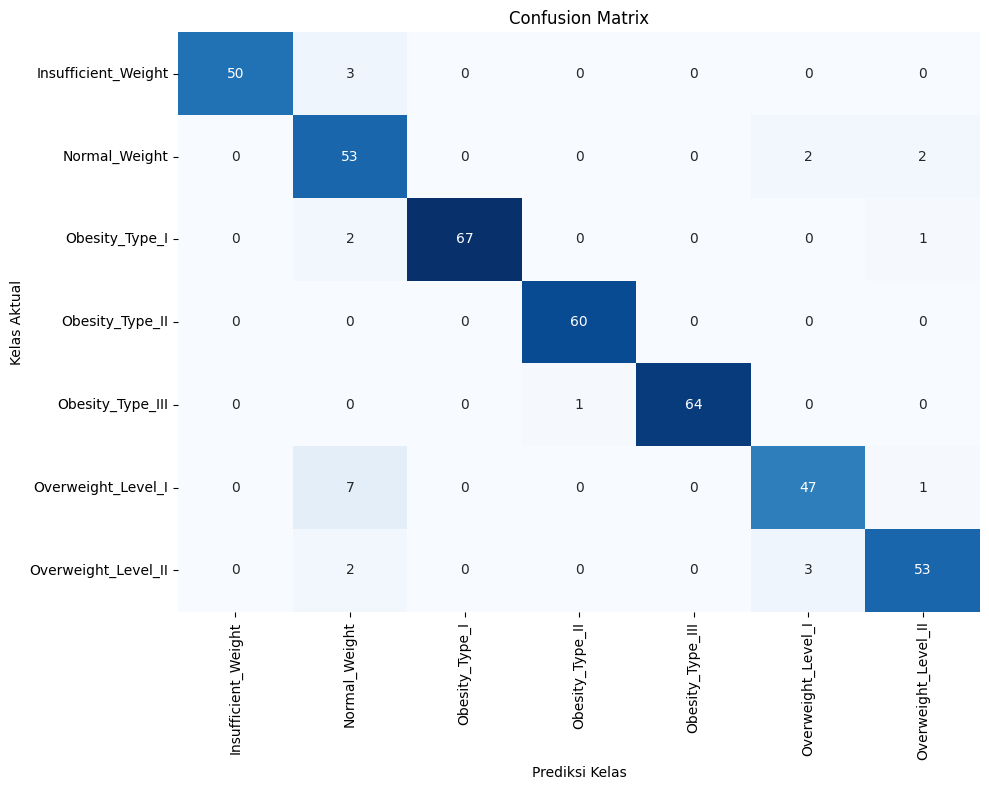


Feature Importance (Top 10):
Weight           0.280567
Age              0.092311
Height           0.079877
FCVC             0.078358
NCP              0.052285
FAF              0.046354
TUE              0.045436
CH2O             0.044129
Gender_Female    0.035693
Gender_Male      0.034883
dtype: float64


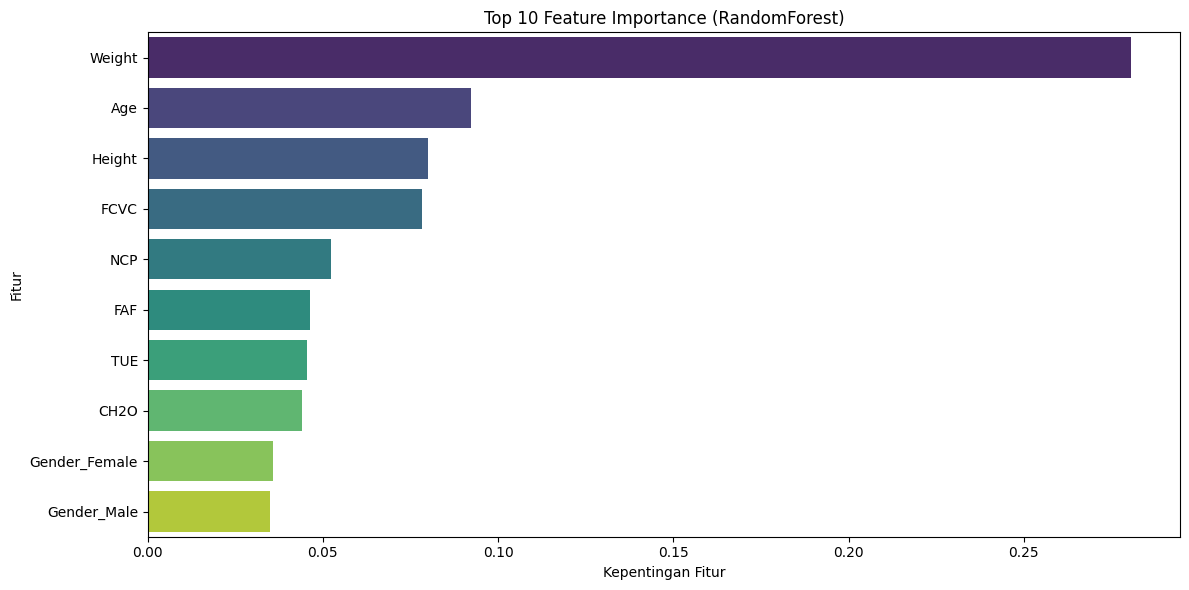


Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.79      0.93      0.85        57
     Obesity_Type_I       0.99      0.96      0.97        70
    Obesity_Type_II       1.00      1.00      1.00        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.91      0.87      0.89        55
Overweight_Level_II       0.95      0.91      0.93        58

           accuracy                           0.94       418
          macro avg       0.95      0.94      0.94       418
       weighted avg       0.95      0.94      0.95       418



In [36]:
print("Training Model Final")

# Gunakan n_estimators optimal (berdasarkan test accuracy)
final_n_estimators = int(optimal_n_est)
print(f"\nMenggunakan N_Estimators = {final_n_estimators}")

final_model = RandomForestClassifier(n_estimators=final_n_estimators, random_state=42, n_jobs=-1)

final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_model)
])

# Train
final_pipeline.fit(X_train, y_train)

# Prediksi
y_pred_final = final_pipeline.predict(X_test)

# Evaluasi
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nFinal Model Test Accuracy: {final_accuracy:.4f}")

# Confusion Matrix (visualisasi heatmap)
cm = confusion_matrix(y_test, y_pred)
class_names = pipeline.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Kelas')
plt.ylabel('Kelas Aktual')
plt.tight_layout()
plt.show()  


# Feature Importance
feature_importances = pipeline['classifier'].feature_importances_
feature_names_processed = pipeline['preprocessor'].get_feature_names_out()
importance_series = pd.Series(feature_importances, index=feature_names_processed).sort_values(ascending=False)

# Tampilkan top 10 feature importance
print("\nFeature Importance (Top 10):")
print(importance_series.head(10))

# Visualisasi Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_series.head(10).values, y=importance_series.head(10).index, palette='viridis')
plt.title('Top 10 Feature Importance (RandomForest)')
plt.xlabel('Kepentingan Fitur')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()  # Opsional


print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

In [37]:
# Simpan model
model_filename = f"model_obesity_n_estimators_{final_n_estimators}.pkl"
joblib.dump(final_pipeline, model_filename)
print(f"\n✓ Model disimpan ke: {model_filename}")


✓ Model disimpan ke: model_obesity_n_estimators_200.pkl
